In [23]:
"""
Functions for random parameter search.
"""

import pickle
import numpy as np
import matplotlib.pyplot as plt

from numba import jit
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings("ignore")
error_message = 'Excess work done on this call (perhaps wrong Dfun type).'

In [27]:
@jit(nopython=True)
def system(S, t, k, K):
    """
    The function of the system for scipy.integrate.odeint.
    
    Parameters
    --------------
    S : array
    Condition of substrates 
    t : array
    A sequence of time points.
    k : array
    Rate constants.
    K: array
    MM constants.
    
    Returns
    ----------
    Sintg : array
    The change of S.
    """
    
    Sintg = np.empty(6)
    Sa_00, Sa_01, Sa_10, Sb_00, Sb_01, Sb_10 = S
    
    E = 20./(1 + Sa_00/K[0] + Sa_00/K[1] + Sa_01/K[2]   + Sa_10/K[3]
                  + Sb_00/K[8] + Sb_00/K[9] + Sb_01/K[10] + Sb_10/K[11])
    F = 20./(1 + Sa_01/K[4]   + Sa_10/K[5]   + (1000.-Sa_00-Sa_01-Sa_10)/K[6]   + (1000.-Sa_00-Sa_01-Sa_10)/K[7]
                  + Sb_01/K[12] + Sb_10/K[13] + (1000.-Sb_00-Sb_01-Sb_10)/K[14] + (1000.-Sb_00-Sb_01-Sb_10)/K[15])
             
    Sintg[0] = - k[0]*E*Sa_00/K[0] - k[1]*E*Sa_00/K[1] + k[4]*F*Sa_01/K[4] + k[5]*F*Sa_10/K[5]
    Sintg[1] = - k[4]*F*Sa_01/K[4] - k[2]*E*Sa_01/K[2] + k[0]*E*Sa_00/K[0] + k[6]*F*(1000.-Sa_00-Sa_01-Sa_10)/K[6]
    Sintg[2] = - k[5]*F*Sa_10/K[5] - k[3]*E*Sa_10/K[3] + k[1]*E*Sa_00/K[1] + k[7]*F*(1000.-Sa_00-Sa_01-Sa_10)/K[7]
    Sintg[3] = - k[8]*E*Sb_00/K[8] - k[9]*E*Sb_00/K[9] + k[12]*F*Sb_01/K[12] + k[13]*F*Sb_10/K[13]
    Sintg[4] = - k[12]*F*Sb_01/K[12] - k[10]*E*Sb_01/K[10] + k[8]*E*Sb_00/K[8] + k[14]*F*(1000.-Sb_00-Sb_01-Sb_10)/K[14]
    Sintg[5] = - k[13]*F*Sb_10/K[13] - k[11]*E*Sb_10/K[11] + k[9]*E*Sb_00/K[9] + k[15]*F*(1000.-Sb_00-Sb_01-Sb_10)/K[15]
             
    return(Sintg)

S0 = np.asarray([1000., 0., 0., 1000., 0., 0.])
def integration(param, S0=S0):
    """
    Conduct numerical integration with a given parameter set.
    
    Parameters
    --------------
    param : list
    A list of (k, Km).
    S0 : list
    Initial concentration of the states of the substrates.
    
    Returns
    ----------
    S : array
    Numerically integrated temporal evolution of the system.
    """
    
    dt = 0.02
    trange = 6000
    
    S, info = odeint(func=system, y0=S0, t=np.arange(0, trange, dt), args=(k, K), full_output=1)
    return(S)

In [19]:
with open('./chaosparam.pickle', 'rb') as f:
    sample = pickle.load(f)[0]
k = 10**(1.5*sample[:16]+1.5)
K = 10**(2.5*sample[16:]+0.5)

sampleparam = [k, K]    

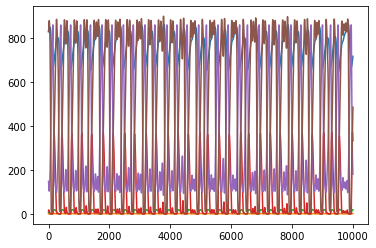

In [24]:
trajectory = integration(sampleparam)

# visualize the temporal evolution of each substrate state.
plt.plot(trajectory[290000:])
plt.show()
plt.close()

In [ ]:
t_ends = []
for dt in np.arange(0, 1, 0.001):
    s0 = S0+np.asarray([-dt, dt, 0, 0, 0, 0])
    t_end = integration(sampleparam, S0=s0)[-1]
    t_ends.append(t_end)

In [ ]:
t_endss = np.vstack(t_ends)

In [ ]:
# visualize the trajectory
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
#x, y, z = trajectory[290000:, :3].T
#ax.plot(x, y, z)

ax.scatter(t_endss[0], t_endss[1], t_endss[2], color='red', s=10)

plt.show()
plt.close()